In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
links_df = pd.read_csv('data/links.csv')
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [3]:
movies_df = pd.read_csv('data/movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings_df = pd.read_csv('data/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df = movies_df.merge(ratings_df, on='movieId')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [7]:
df.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


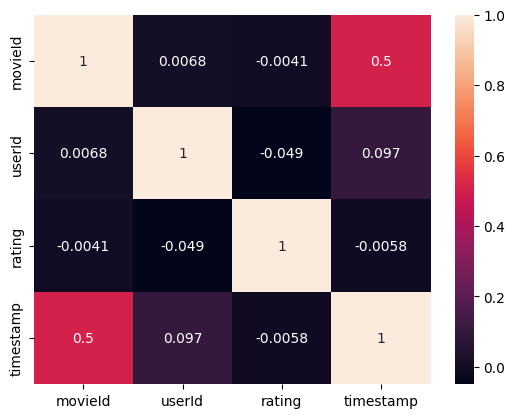

In [8]:
heatmap=sns.heatmap(df.drop(columns={'title','genres'},axis=1).corr(),annot=True)

In [9]:
df.shape

(100836, 6)

In [10]:
movies_df['movieId']

0            1
1            2
2            3
3            4
4            5
         ...  
9737    193581
9738    193583
9739    193585
9740    193587
9741    193609
Name: movieId, Length: 9742, dtype: int64

In [11]:
df[4000:5000]

,movieId,title,genres,userId,rating,timestamp
4000,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,274,2.0,1171758635
4001,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,284,3.0,832699698
4002,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,305,4.0,1494246524
4003,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,307,3.0,1186085751
4004,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,318,3.5,1263848636
...,...,...,...,...,...,...
4995,168,First Knight (1995),Action|Drama|Romance,524,2.0,851608875
4996,168,First Knight (1995),Action|Drama|Romance,559,3.0,845476105
4997,168,First Knight (1995),Action|Drama|Romance,586,3.5,1529902272
4998,168,First Knight (1995),Action|Drama|Romance,590,3.0,1258421429


In [12]:
df[df['title']=='Aladdin (1992)']

,movieId,title,genres,userId,rating,timestamp
15468,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,4,4.0,945079670
15469,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,5,4.0,847434801
15470,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,6,5.0,845553146
15471,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,7,3.0,1106635971
15472,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,10,4.0,1455306173
...,...,...,...,...,...,...
15646,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,599,3.0,1498523587
15647,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,600,3.5,1237709466
15648,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,604,3.0,832079796
15649,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,605,3.5,1277096156


In [13]:
M_j = 'Aladdin (1992)' # Title as input, now it's just one movie
recommended_movies = []

In [14]:
# Find the movie in the database, and sort it by rating
movie_db = df[df['title'] == M_j].sort_values(by='rating', ascending=False)

In [15]:

# Get the first 5 users who liked this movie
for user in movie_db.iloc[:5]['userId'].values:
    
    # Get the rated movies for this user
    rated_movies = df[df['userId'] == user]
    
    # Get the five biggest rated movie by this user
    rated_movies = rated_movies[rated_movies['title'] != M_j]\
                    .sort_values(by='rating', ascending=False)\
                    .iloc[:5]
    
    # Add these to the recommendations
    recommended_movies.extend(list(rated_movies['title'].values))
    

In [16]:
recommended_movies = np.unique(recommended_movies)
    
for movie in recommended_movies:
    print(movie)

Airplane! (1980)
American Beauty (1999)
Beauty and the Beast (1991)
Casino Royale (2006)
Death Becomes Her (1992)
Down Periscope (1996)
Fight Club (1999)
Grosse Pointe Blank (1997)
Guardians of the Galaxy (2014)
Harry Potter and the Chamber of Secrets (2002)
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
How to Train Your Dragon (2010)
Iron Giant, The (1999)
Jungle Book, The (1994)
Jurassic Park (1993)
Kiki's Delivery Service (Majo no takkyûbin) (1989)
Little Women (1994)
Lord of the Rings: The Fellowship of the Ring, The (2001)
Pinocchio (1940)
Spider-Man 2 (2004)
Terminator 2: Judgment Day (1991)
Tombstone (1993)
Toy Story (1995)
Who Framed Roger Rabbit? (1988)


In [17]:
gmovie_genres = df[df['title'] == M_j].iloc[0]['genres'].split('|')
scores = {}  # {title: score ...}

In [18]:
gmovie_genres

['Adventure', 'Animation', 'Children', 'Comedy', 'Musical']

In [19]:
for movie in recommended_movies:#first movie is willow
    movied = df[df['title'] == movie].iloc[0]# don't take all users who watched it, take only the first user
    movie_genres = movied['genres'].split('|')#split the genre of
    score = 0
    
    # How many gmovie_genre can be found in movie_genres?
    for gmovie_genre in gmovie_genres:
        if gmovie_genre in movie_genres:
            score += 1

    scores[movie] = score
    
# Sort them on score and reverse it, because the bigger the score the better 
recommended_movies = sorted(scores, key=lambda x: scores[x])[::-1]  

In [20]:
for movie in recommended_movies:
    print(movie)

Who Framed Roger Rabbit? (1988)
Toy Story (1995)
Pinocchio (1940)
Kiki's Delivery Service (Majo no takkyûbin) (1989)
Iron Giant, The (1999)
How to Train Your Dragon (2010)
Beauty and the Beast (1991)
Jungle Book, The (1994)
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
Spider-Man 2 (2004)
Lord of the Rings: The Fellowship of the Ring, The (2001)
Jurassic Park (1993)
Harry Potter and the Chamber of Secrets (2002)
Guardians of the Galaxy (2014)
Grosse Pointe Blank (1997)
Down Periscope (1996)
Death Becomes Her (1992)
Casino Royale (2006)
Airplane! (1980)
Tombstone (1993)
Terminator 2: Judgment Day (1991)
Little Women (1994)
Fight Club (1999)
American Beauty (1999)


In [23]:
print(scores['Guardians of the Galaxy (2014)'])

1
